# Projeto 3 - World Happiness Report

Grupo: Gregório Gaio, Guilherme César, Lucas Medeiros, Rodrigo Cruz e Vinicius Maciel

In [203]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [204]:
db_2015 = pd.read_csv('2015.csv',delimiter=',')
db_2016 = pd.read_csv('2016.csv',delimiter=',')
db_2017 = pd.read_csv('2017.csv',delimiter=',')
db_2018 = pd.read_csv('2018.csv',delimiter=',')
db_2019 = pd.read_csv('2019.csv',delimiter=',')

#### 1. Top 10 índices de felicidade de cada ano de 2015-2019

In [205]:
db_todos_anos_pais = pd.DataFrame({'Countries 2015': db_2015['Country'],'Countries 2016':db_2016['Country'],'Countries 2017':db_2017['Country'],
'Countries 2018':db_2018['Country or region'],'Countries 2019':db_2019['Country or region']})
ind = np.array(range(1,11))
db_top_10_todos_anos = db_todos_anos_pais.head(10).set_index(ind)
db_top_10_todos_anos.index.names=['Posição']
display(db_top_10_todos_anos)

,Countries 2015,Countries 2016,Countries 2017,Countries 2018,Countries 2019
Posição,,,,,
1,Switzerland,Denmark,Norway,Finland,Finland
2,Iceland,Switzerland,Denmark,Norway,Denmark
3,Denmark,Iceland,Iceland,Denmark,Norway
4,Norway,Norway,Switzerland,Iceland,Iceland
5,Canada,Finland,Finland,Switzerland,Netherlands
6,Finland,Canada,Netherlands,Netherlands,Switzerland
7,Netherlands,Netherlands,Canada,Canada,Sweden
8,Sweden,New Zealand,New Zealand,New Zealand,New Zealand
9,New Zealand,Australia,Sweden,Sweden,Canada


- Preparando um novo DataFrame para plotagem e plotando um gráfico de linhas para facilitar a visualização

In [206]:
ind = db_top_10_todos_anos.melt().iloc[:,1].unique()
df_posicoes = pd.DataFrame(data={'Country':ind})
df_posicoes = df_posicoes.merge(db_2015[['Country', 'Happiness Rank']], on='Country').merge(db_2016[['Country', 'Happiness Rank']], on='Country')\
    .merge(db_2017[['Country', 'Happiness.Rank']], on='Country').merge(db_2018[['Country or region', 'Overall rank']], left_on='Country', right_on='Country or region')\
        .merge(db_2019[['Country or region', 'Overall rank']], left_on='Country', right_on='Country or region').drop(columns=['Country or region_x', 'Country or region_y'])\
            .set_index('Country').rename(columns={'Happiness Rank_x':'2015','Happiness Rank_y':'2016','Happiness.Rank':'2017','Overall rank_x':'2018','Overall rank_y':'2019'})
df_posicoes_t = df_posicoes.T
display(df_posicoes_t)

Country,Switzerland,Iceland,Denmark,Norway,Canada,Finland,Netherlands,Sweden,New Zealand,Australia,Austria
2015,1,2,3,4,5,6,7,8,9,10,13
2016,2,3,1,4,6,5,7,10,8,9,12
2017,4,3,2,1,7,5,6,9,8,10,13
2018,5,4,3,2,7,1,6,9,8,10,12
2019,6,4,2,3,9,1,5,7,8,11,10


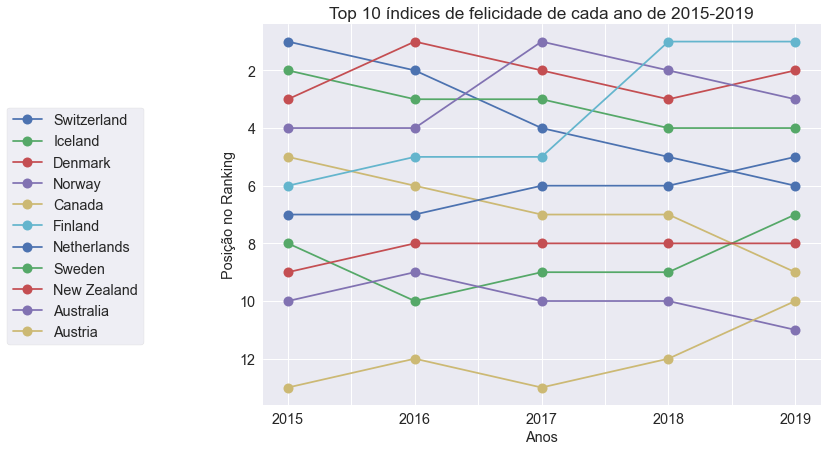

In [207]:
df_posicoes_t.plot(kind="line", figsize=(10, 7), marker="o", ms=10, fontsize = 'large').invert_yaxis()
plt.legend(bbox_to_anchor=(-0.2, 0.80), fontsize = 'large', frameon=True, )
plt.ylabel("Posição no Ranking", fontsize = 'large')
plt.xlabel('Anos',fontsize = 'large')
plt.title('Top 10 índices de felicidade de cada ano de 2015-2019', fontsize = 'x-large')
plt.show()

- Os 10 primeiros não se alteram ao longo dos 5 anos, com exceção da Áustria e Austrália. <br>
- Dinamarca sempre no top 3.<br>
- Maioria dos paises sao Europeus (mais Australia, Canada, e Nova Zelandia).

#### 2. Considerando a média de todas as variáveis, quais foram as 3 variáveis que mais mudaram ano a ano 

In [208]:
db_2015_medias = pd.Series(db_2015.mean(axis=0))
db_2016_medias = pd.Series(db_2016.mean(axis=0))
db_2017_medias = pd.Series(db_2017.mean(axis=0))
db_2018_medias = pd.Series(db_2018.mean(axis=0))
db_2019_medias = pd.Series(db_2019.mean(axis=0))

C:\Users\Guilerme\AppData\Local\Temp\ipykernel_10064\9883795.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  db_2015_medias = pd.Series(db_2015.mean(axis=0))
C:\Users\Guilerme\AppData\Local\Temp\ipykernel_10064\9883795.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  db_2016_medias = pd.Series(db_2016.mean(axis=0))
C:\Users\Guilerme\AppData\Local\Temp\ipykernel_10064\9883795.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  db_2017_medias = pd.Series(db_2017.mean(axis=0))
C:\U

- Precisamos renomear as colunas para evitar problemas

In [209]:
db_2015_medias.rename(index={'Standard Error': 'Lower Confidence Interval'}, inplace= True)
db_2015_medias['Upper Confidence Interval'] = db_2015_medias['Happiness Score'] + db_2015_medias['Lower Confidence Interval'] 
db_2015_medias['Lower Confidence Interval'] = db_2015_medias['Happiness Score'] - db_2015_medias['Lower Confidence Interval']

In [210]:
db_2017_medias.rename(index={'Happiness.Rank': 'Happiness Rank', 'Happiness.Score': 'Happiness Score',
'Whisker.low': 'Lower Confidence Interval', 'Whisker.high': 'Upper Confidence Interval',
'Economy..GDP.per.Capita.': 'Economy (GDP per Capita)', 'Health..Life.Expectancy.': 'Health (Life Expectancy)',
'Trust..Government.Corruption.': 'Trust (Government Corruption)', 'Dystopia.Residual': 'Dystopia Residual'}, inplace= True)

In [211]:
db_2018_medias.rename(index={'Overall rank': 'Happiness Rank', 'Score': 'Happiness Score',
'Freedom to make life choices': 'Freedom',
'GDP per capita': 'Economy (GDP per Capita)', 'Healthy life expectancy': 'Health (Life Expectancy)',
'Perceptions of corruption': 'Trust (Government Corruption)', 'Social support': 'Family'}, inplace= True)

In [212]:
db_2019_medias.rename(index={'Overall rank': 'Happiness Rank', 'Score': 'Happiness Score',
'Freedom to make life choices': 'Freedom',
'GDP per capita': 'Economy (GDP per Capita)', 'Healthy life expectancy': 'Health (Life Expectancy)',
'Perceptions of corruption': 'Trust (Government Corruption)', 'Social support': 'Family'}, inplace= True)

- Fizemos a variação relativa entre as médias

In [213]:
db_variacoes_15_16 = pd.DataFrame({'Medias 2015': db_2015_medias, 'Medias 2016': db_2016_medias})
db_variacoes_16_17 = pd.DataFrame({'Medias 2016': db_2016_medias, 'Medias 2017': db_2017_medias})
db_variacoes_17_18 = pd.DataFrame({'Medias 2017': db_2017_medias, 'Medias 2018': db_2018_medias})
db_variacoes_18_19 = pd.DataFrame({'Medias 2018': db_2018_medias, 'Medias 2019': db_2019_medias})

db_variacoes_15_16['Maiores Variações'] = db_variacoes_15_16.apply(lambda x: np.std(x)/np.mean(x), axis=1)
display('Variacoes 15-16', db_variacoes_15_16['Maiores Variações'].sort_values(ascending=False).head(3))

db_variacoes_16_17['Maiores Variações'] = db_variacoes_16_17.apply(lambda x: np.std(x)/np.mean(x), axis=1)
display('Variacoes 16-17', db_variacoes_16_17['Maiores Variações'].sort_values(ascending=False).head(3))

db_variacoes_17_18['Maiores Variações'] = db_variacoes_17_18.apply(lambda x: np.std(x)/np.mean(x), axis=1)
display('Variacoes 17-18', db_variacoes_17_18['Maiores Variações'].sort_values(ascending=False).head(3))

db_variacoes_18_19['Maiores Variações'] = db_variacoes_18_19.apply(lambda x: np.std(x)/np.mean(x), axis=1)
display('Variacoes 18-19', db_variacoes_18_19['Maiores Variações'].sort_values(ascending=False).head(3))


'Variacoes 15-16'

Family                      0.110623
Freedom                     0.072062
Health (Life Expectancy)    0.061151
Name: Maiores Variações, dtype: float64

'Variacoes 16-17'

Family                           0.199381
Dystopia Residual                0.113880
Trust (Government Corruption)    0.055624
Name: Maiores Variações, dtype: float64

'Variacoes 17-18'

Generosity                  0.153958
Freedom                     0.052961
Economy (GDP per Capita)    0.049713
Name: Maiores Variações, dtype: float64

'Variacoes 18-19'

Health (Life Expectancy)    0.096702
Freedom                     0.073117
Generosity                  0.010495
Name: Maiores Variações, dtype: float64

#### 3. Quais foram os top 3 países que mais tiveram mudança positiva e negativa de GPD

In [214]:
db_2015_gdp = pd.DataFrame({'GDP 2015': list(db_2015['Economy (GDP per Capita)'])}, index=db_2015['Country'])
db_2016_gdp = pd.DataFrame({'GDP 2016': list(db_2016['Economy (GDP per Capita)'])}, index=db_2016['Country'])
db_2017_gdp = pd.DataFrame({'GDP 2017': list(db_2017['Economy..GDP.per.Capita.'])}, index=db_2017['Country'])
db_2018_gdp = pd.DataFrame({'Country':db_2018['Country or region'], 'GDP 2018': list(db_2018['GDP per capita'])})
db_2019_gdp = pd.DataFrame({'Country':db_2019['Country or region'], 'GDP 2019': list(db_2019['GDP per capita'])})

In [215]:
db_gdp_16_17 = db_2016_gdp.merge(db_2017_gdp, on='Country')
db_gdp_16_17['delta GDP'] = db_gdp_16_17['GDP 2017'] - db_gdp_16_17['GDP 2016']
display(db_gdp_16_17['delta GDP'].nlargest(3)) #tres maiores positivos
display(db_gdp_16_17['delta GDP'].nsmallest(3)) #tres maiores negativos

Country
Mali       0.163260
Malawi     0.146352
Georgia    0.112693
Name: delta GDP, dtype: float64

Country
Lebanon     -0.047692
Jordan      -0.005718
Venezuela   -0.005239
Name: delta GDP, dtype: float64

#### 5. Qual foi o país que mais subiu no ranking no período inteiro analisado

- Dropamos as colunas irrelevantes e renomeamos o resto

In [216]:
db_2015_limpa= db_2015.drop(['Standard Error','Region','Dystopia Residual'],axis=1)

In [217]:
db_2016_limpa= db_2016.drop(['Region','Lower Confidence Interval', 'Upper Confidence Interval','Dystopia Residual'],axis=1)

In [218]:
db_2017_limpa= db_2017.drop(['Whisker.high','Whisker.low','Dystopia.Residual'],axis=1)
db_2017_limpa.columns=['Country', 'Happiness Rank', 'Happiness Score',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity']

In [219]:
db_2018_limpa=db_2018
db_2018_limpa.columns=['Happiness Rank', 'Country', 'Happiness Score',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity']

In [220]:
db_2019_limpa=db_2019
db_2019_limpa.columns=[ 'Happiness Rank', 'Country', 'Happiness Score',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity']

In [221]:
df_happiness_rank = db_2015_limpa[['Country','Happiness Rank']].merge(db_2019_limpa[['Country','Happiness Rank']], on='Country', suffixes=('_2015','_2019'))
df_happiness_rank['Delta Happiness'] = df_happiness_rank['Happiness Rank_2015'] - df_happiness_rank['Happiness Rank_2019']
df_happiness_rank.nlargest(1, columns='Delta Happiness')

,Country,Happiness Rank_2015,Happiness Rank_2019,Delta Happiness
145,Benin,155,102,53


#### 6. Teve países que saíram ou entraram do index?

- A princípio, qualquer país que apareça menos de 5 vezes foi incluído ou tirado da lista

In [222]:
aparicoes_paises = pd.concat([db_2015_limpa['Country'],db_2016_limpa['Country'],db_2017_limpa['Country'],db_2018_limpa['Country'],db_2019_limpa['Country']]).reset_index()
serie_aparicoes = aparicoes_paises.groupby('Country').agg('size')
paises_movimentados = serie_aparicoes[serie_aparicoes<5]
print(paises_movimentados)

Country
Angola                      4
Belize                      3
Central African Republic    4
Comoros                     3
Djibouti                    1
Gambia                      1
Hong Kong                   4
Hong Kong S.A.R., China     1
Laos                        4
Lesotho                     4
Macedonia                   4
Mozambique                  4
Namibia                     4
North Cyprus                3
North Macedonia             1
Northern Cyprus             2
Oman                        1
Puerto Rico                 1
Somalia                     4
Somaliland Region           1
Somaliland region           1
South Sudan                 4
Sudan                       4
Suriname                    2
Swaziland                   2
Taiwan                      4
Taiwan Province of China    1
Trinidad & Tobago           2
Trinidad and Tobago         3
dtype: int64


Após análise da lista, a equipe percebeu que alguns países representados na base de dados mudaram de nome ao longo do tempo, entretanto, nunca foram excluídos ou inseridos no index, poluíndo assim a lista final. A partir de pesquisas, os países que mudaram de nome e estiveram sempre no index foram removidos manualmente da lista. Ademais, o país 'Somaliland Region', possuía em uma das bases um erro de digitação, em que uma nas letras iniciais estava minúscula. Esse dado também foi retirado da lista final.

In [223]:
paises_movimentados  = paises_movimentados.drop(['Hong Kong', 'Hong Kong S.A.R., China', 'North Cyprus', 'Northern Cyprus', 'Somaliland region', 'Taiwan', 'Taiwan Province of China', 'Trinidad & Tobago', 'Trinidad and Tobago', 'Macedonia', 'North Macedonia'])
lista_paises_movimentados = list(paises_movimentados.index)
print(lista_paises_movimentados)

['Angola', 'Belize', 'Central African Republic', 'Comoros', 'Djibouti', 'Gambia', 'Laos', 'Lesotho', 'Mozambique', 'Namibia', 'Oman', 'Puerto Rico', 'Somalia', 'Somaliland Region', 'South Sudan', 'Sudan', 'Suriname', 'Swaziland']


#### 7. Quais foram os 3 países que mais tiveram mudança na expectativa de vida, positiva e negativa de 2017 para 2018

In [224]:
db_life_expectancy = db_2017_limpa[['Country', 'Health (Life Expectancy)']].merge(db_2018_limpa[['Country', 'Health (Life Expectancy)']], on='Country', suffixes=('_2017', '_2018'))
db_life_expectancy['delta life expectancy'] = db_life_expectancy['Health (Life Expectancy)_2018'] - db_life_expectancy['Health (Life Expectancy)_2017']
display(db_life_expectancy.nlargest(3, columns='delta life expectancy')) #tres maiores positivos
display(db_life_expectancy.nsmallest(3, columns='delta life expectancy')) #tres maiores negativos

,Country,Health (Life Expectancy)_2017,Health (Life Expectancy)_2018,delta life expectancy
135,Angola,0.049869,0.269,0.219131
107,Kenya,0.309988,0.454,0.144012
96,South Africa,0.187080,0.330,0.142920


,Country,Health (Life Expectancy)_2017,Health (Life Expectancy)_2018,delta life expectancy
20,United Arab Emirates,0.726798,0.670,-0.056798
130,Niger,0.268505,0.221,-0.047505
122,Mali,0.169366,0.152,-0.017366


#### 8. Até 2 questões extras que vocês acham interessante analisar

8a. Últimos 10 índices de felicidade de cada ano de 2015-2019

- Análise feita de forma similar à da primeira questão, mas como o número de países na lista varia, precisamos pegar os últimos 10 ano a ano e concatenar.

In [225]:
ten_lowest_15=db_2015_limpa.nsmallest(10,'Happiness Score')
ten_lowest_16=db_2016_limpa.nsmallest(10,'Happiness Score')
ten_lowest_17=db_2017_limpa.nsmallest(10,'Happiness Score')
ten_lowest_18=db_2018_limpa.nsmallest(10,'Happiness Score')
ten_lowest_19=db_2019_limpa.nsmallest(10,'Happiness Score')

In [226]:
ten_lowest_15_novo=pd.Series(ten_lowest_15['Country']).reset_index(drop=True)
ten_lowest_16_novo=pd.Series(ten_lowest_16['Country']).reset_index(drop=True)
ten_lowest_17_novo=pd.Series(ten_lowest_17['Country']).reset_index(drop=True)
ten_lowest_18_novo=pd.Series(ten_lowest_18['Country']).reset_index(drop=True)
ten_lowest_19_novo=pd.Series(ten_lowest_19['Country']).reset_index(drop=True)
ten_lowest=pd.concat([ten_lowest_15_novo,ten_lowest_16_novo,ten_lowest_17_novo,ten_lowest_18_novo,ten_lowest_19_novo],axis=1)

ind = np.array(range(1,11))
ten_lowest = ten_lowest.head(10).set_index(ind)
ten_lowest.index.names=['Posição no bottom 10']
display(ten_lowest)

,Country,Country,Country,Country,Country
Posição no bottom 10,,,,,
1,Togo,Burundi,Central African Republic,Burundi,South Sudan
2,Burundi,Syria,Burundi,Central African Republic,Central African Republic
3,Syria,Togo,Tanzania,South Sudan,Afghanistan
4,Benin,Afghanistan,Syria,Tanzania,Tanzania
5,Rwanda,Benin,Rwanda,Yemen,Rwanda
6,Afghanistan,Rwanda,Togo,Rwanda,Yemen
7,Burkina Faso,Guinea,Guinea,Syria,Malawi
8,Ivory Coast,Liberia,Liberia,Liberia,Syria
9,Guinea,Tanzania,South Sudan,Haiti,Botswana


- Novamente, preparando um DataFrame para plotagem e plotando.

In [227]:
ind = ten_lowest.melt().iloc[:,1].unique()
df_posicoes_low = pd.DataFrame(data={'Country':ind})
df_posicoes_low = df_posicoes_low.merge(db_2015[['Country', 'Happiness Rank']], on='Country').merge(db_2016[['Country', 'Happiness Rank']], on='Country')\
    .merge(db_2017[['Country', 'Happiness.Rank']], on='Country').merge(db_2018[['Country', 'Happiness Rank']], on='Country')\
        .merge(db_2019[['Country', 'Happiness Rank']], on='Country').set_index('Country').rename(columns={'Happiness Rank_x':'2015','Happiness Rank_y':'2016','Happiness.Rank':'2017','Happiness Rank_x':'2018','Happiness Rank_y':'2019'})
df_posicoes_t_low = df_posicoes_low.T
display(df_posicoes_t_low)

C:\Users\Guilerme\AppData\Local\Temp\ipykernel_10064\3738862597.py:3: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Happiness Rank_x'} in the result is deprecated and will raise a MergeError in a future version.
  df_posicoes_low = df_posicoes_low.merge(db_2015[['Country', 'Happiness Rank']], on='Country').merge(db_2016[['Country', 'Happiness Rank']], on='Country')\


Country,Togo,Burundi,Syria,Benin,Rwanda,Afghanistan,Burkina Faso,Ivory Coast,Guinea,Chad,Liberia,Tanzania,Madagascar,Yemen,Haiti,Malawi,Botswana
2018,158,157,156,155,154,153,152,151,150,149,116,146,147,136,119,131,128
2019,155,157,156,153,152,154,145,139,151,144,150,149,148,147,136,132,137
2017,150,154,152,143,151,141,134,128,149,137,148,153,144,146,145,136,142
2018,139,156,150,136,151,145,121,107,140,131,149,153,143,152,148,147,146
2019,139,145,149,102,152,154,115,99,118,132,141,153,143,151,147,150,148


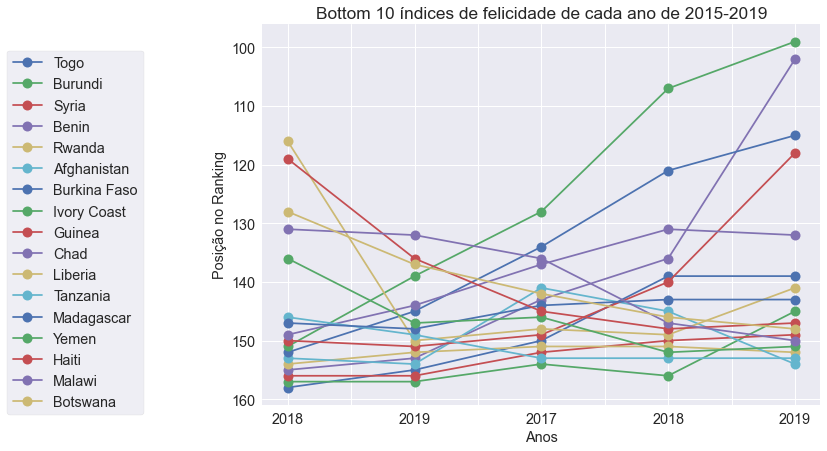

In [228]:
df_posicoes_t_low.plot(kind="line", figsize=(10, 7), marker="o", ms=10, fontsize = 'large').invert_yaxis()
plt.legend(bbox_to_anchor=(-0.2, 0.95), fontsize = 'large', frameon=True, )
plt.ylabel("Posição no Ranking", fontsize = 'large')
plt.xlabel('Anos',fontsize = 'large')
plt.title('Bottom 10 índices de felicidade de cada ano de 2015-2019', fontsize = 'x-large')
plt.show()

- Vale ressantar que, neste gráfico, as posições no ranking são absolutas, podendo flutuar de ano a ano devido a mudanças na quantidade de países inclusos no ranking.

8b. Considerando a média de todas as variáveis, quais foram as 3 variáveis que mais mudaram no período de 2015-2019. 

- Aqui, consideramos o desvio padrão normalizado como medida de variação

In [229]:
db_variacoes_todos_anos = pd.DataFrame({'Medias 2015': db_2015_medias, 'Medias 2016': db_2016_medias, 
'Medias 2017': db_2017_medias, 'Medias 2018': db_2018_medias, 'Medias 2019': db_2019_medias})

db_variacoes_todos_anos['Maiores Variações'] = db_variacoes_todos_anos.apply(lambda x: np.std(x)/np.mean(x), axis=1)
display('Variacoes de 2015 à 2019', db_variacoes_todos_anos['Maiores Variações'].sort_values(ascending=False).head(3))

'Variacoes de 2015 à 2019'

Family                           0.152902
Generosity                       0.133877
Trust (Government Corruption)    0.105707
Name: Maiores Variações, dtype: float64